In [3]:
import pandas as pd

import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install wordcloud

In [5]:
import pandas as pd

import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('world_population.csv')

In [7]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [9]:
    df.shape

(234, 17)

In [10]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [11]:
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [12]:
df.describe().T.sort_values(ascending=0, by="mean").style.background_gradient(cmap = "BuGn")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [13]:
df.nunique()

Rank                           234
CCA3                           234
Country/Territory              234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [15]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [16]:
data=df.drop(columns=['Continent', 'CCA3', 'Country/Territory', 'Capital'])

In [17]:
data.head()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [18]:
data.corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


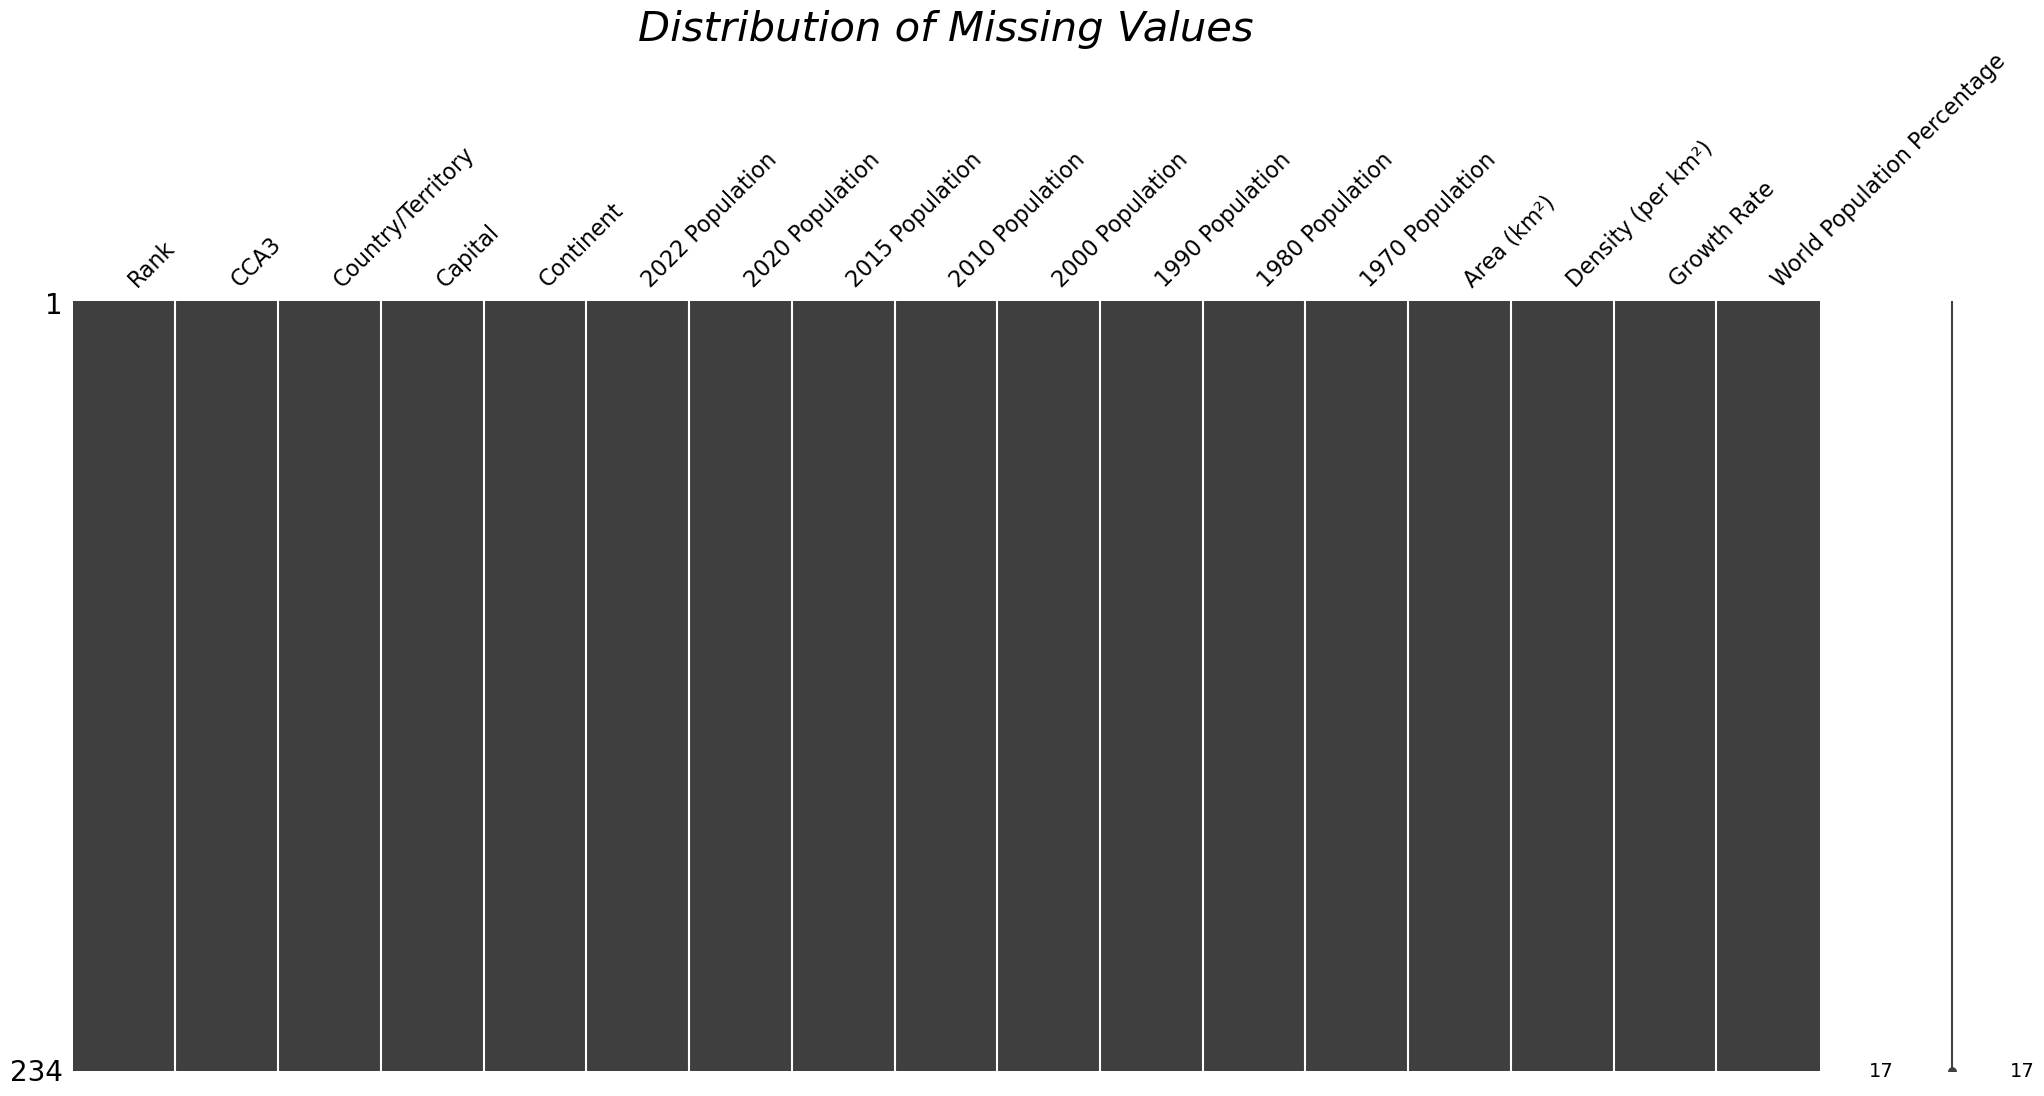

In [19]:
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

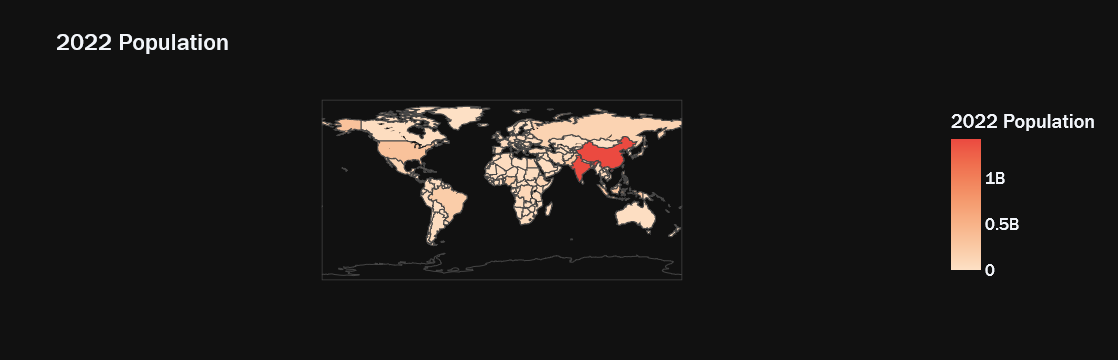

In [20]:
fig1 = px.choropleth(df,
                     locations='Country/Territory',
                     locationmode='country names',
                     color='2022 Population',
                     color_continuous_scale=px.colors.sequential.Peach,
                     template='plotly_dark',
                     title = '2022 Population')

fig1.update_layout(font = dict(size = 17, family="Franklin Gothic"))

fig1.show()

In [21]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


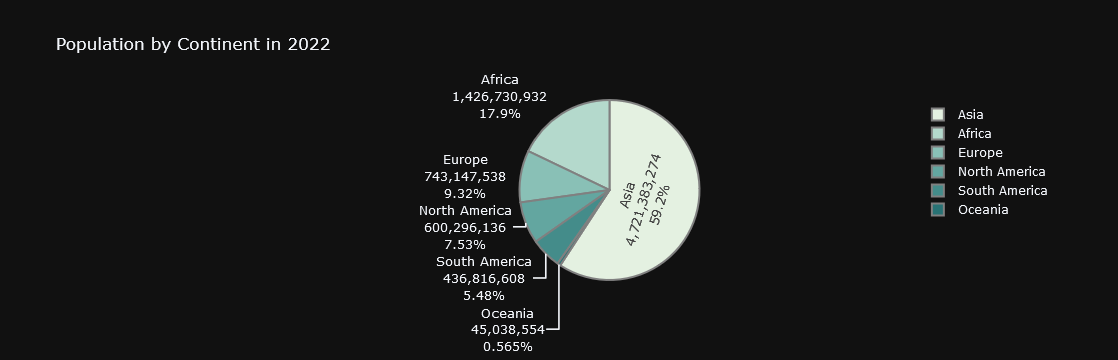

In [49]:
population2022=df.groupby(by='Continent')['2022 Population'].sum()
fig=px.pie(values=population2022.values,
          names=population2022.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'Population by Continent in 2022',template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

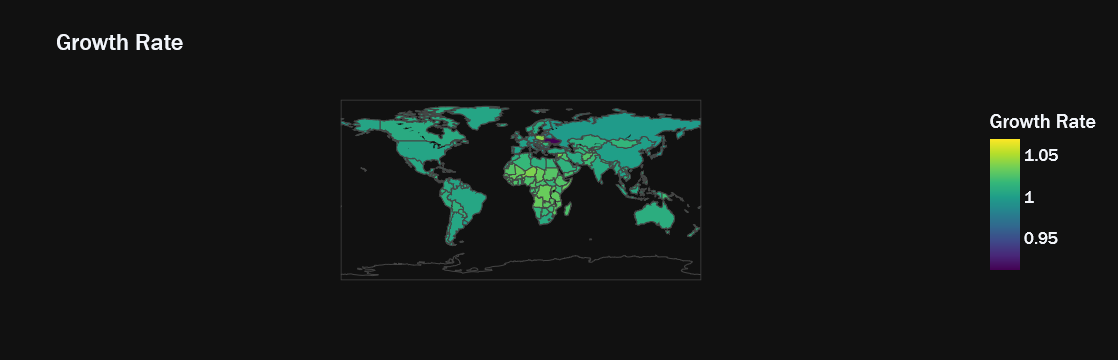

In [53]:
fig=px.choropleth(df, locations='Country/Territory', locationmode='country names', color='Growth Rate', color_continuous_scale='Viridis', template='plotly_dark', title='Growth Rate')


fig.update_layout(font=dict(size=17, family='Franklin Gothic'))

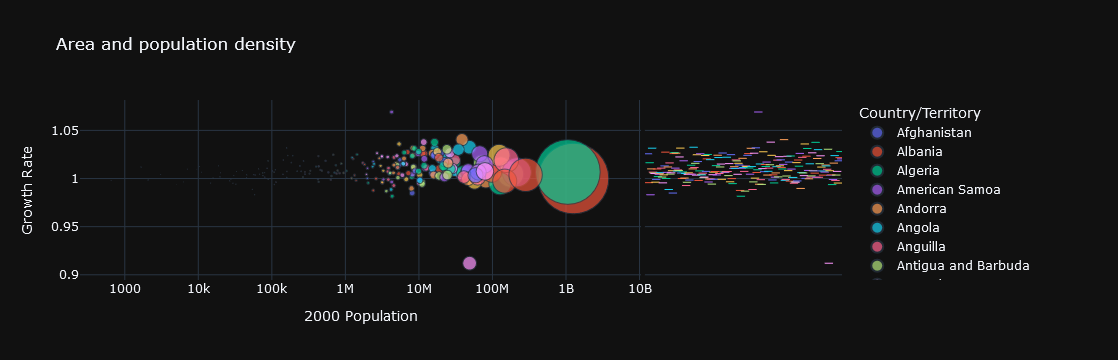

In [65]:
fig=px.scatter(df, x='2000 Population', y='Growth Rate', size='2000 Population',  color='Country/Territory', log_x=True, size_max=50, template='plotly_dark',title='Area and population density', marginal_y='rug')

fig.show()

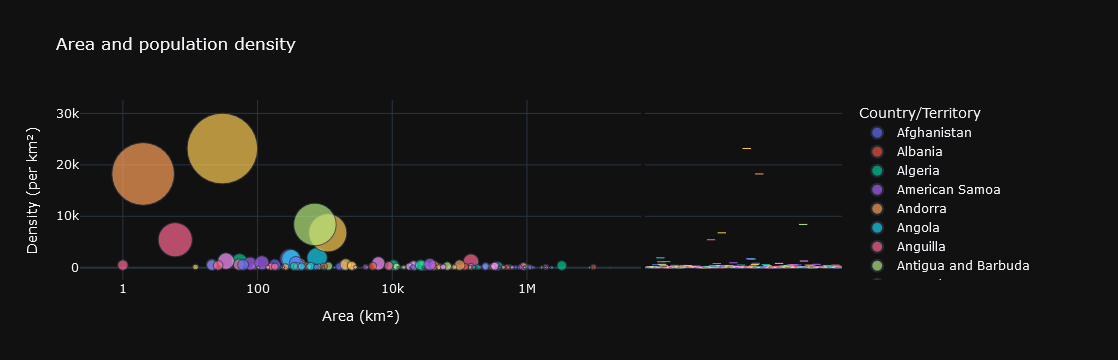

In [69]:
fig=px.scatter(df, x= 'Area (km²)', y='Density (per km²)', size='Density (per km²)', color='Country/Territory', log_x=True, size_max=50, template='plotly_dark', title='Area and population density', marginal_y='rug')

fig.show()

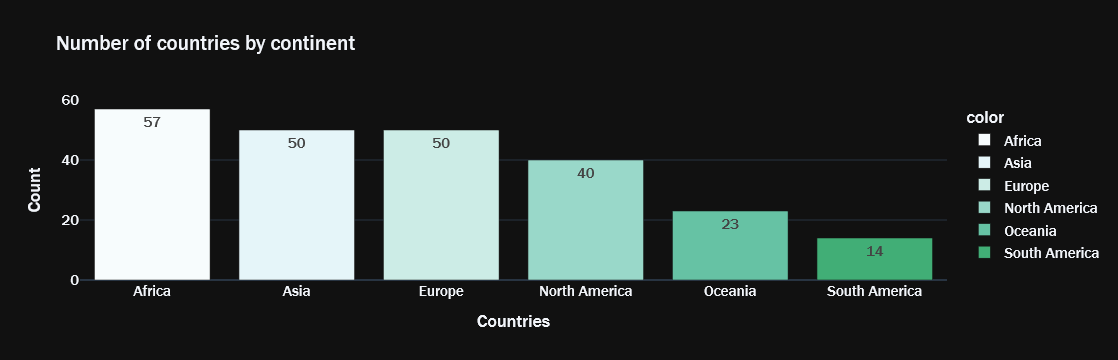

In [77]:
country=df['Continent'].value_counts()

fig=px.bar(x=country.index, y=country.values, color=country.index, color_discrete_sequence=px.colors.sequential.BuGn, text=country.values, title='Number of countries by continent', template='plotly_dark')

fig.update_layout(xaxis_title="Countries",
                 yaxis_title="Count",
                 font=dict(size=15, family="Franklin Gothic"))

fig.show()